In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_19397/1936589094.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('/Users/joeyposillico/Desktop/project 3/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Pre Processing

In [3]:
df.shape

(20640, 10)

In [4]:
#Checking null values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- 207 null valus in the total bedrooms column, this is roughly just 1% of the total data so it is small enough to drop

In [5]:
#dropping null values
df = df.dropna()
print(df.isna().sum())
print(df.shape)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
(20433, 10)


In [6]:
#getting basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

- ocean proximity is an object and if we want to use it in a linear regression it needs to be changed to numerical values

In [9]:
# Get dummies for 'ocean_proximity' and drop the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [11]:
# storing the new columns in a variable to be altered
ocean_proximity_columns = ['ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 
                           'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

# Changing the true false values into 1/0 values for easier use in regression
df[ocean_proximity_columns] = df[ocean_proximity_columns].astype(int)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [12]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

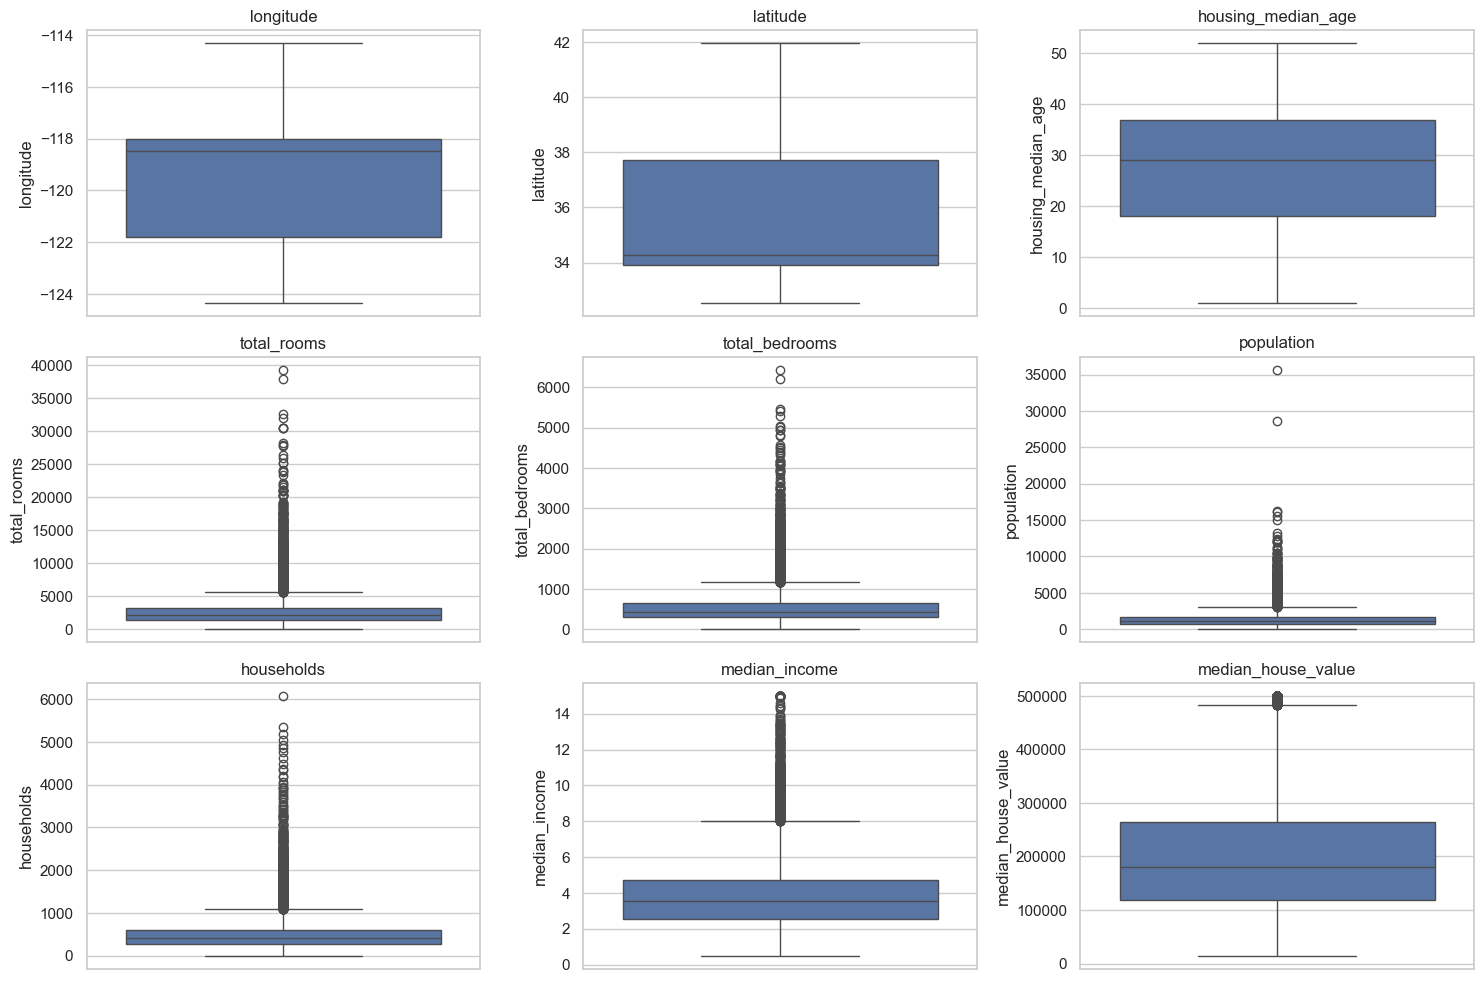

In [13]:
# Set the visual style
sns.set(style="whitegrid")

#Box plots for only numerical columns not the one-hotted columns
numerical_columns = df.columns[:-4]  # Exclude ocean_proximity T/F columns

#size of the figure
plt.figure(figsize=(15, 10))

# loops each numerical column to create box plots to check for outliers
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1) 
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Removing Outliers
- Clearly the boxplots show that there are outliers present in these columns.
- to deal with the outliers, I will check IQR and remove values outside the lower and upper bounds
- Values that are between the lower and upper bounds will be kept.

In [14]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25) # 25th quantile
    Q3 = df[column].quantile(0.75) # 75th quantile
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR # Upper bound for outliers 
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] # Return dataframe with outliers removed

# Remove outliers for all numerical columns
for column in numerical_columns:
    df = remove_outliers_iqr(df, column) # Remove outliers using the function created above

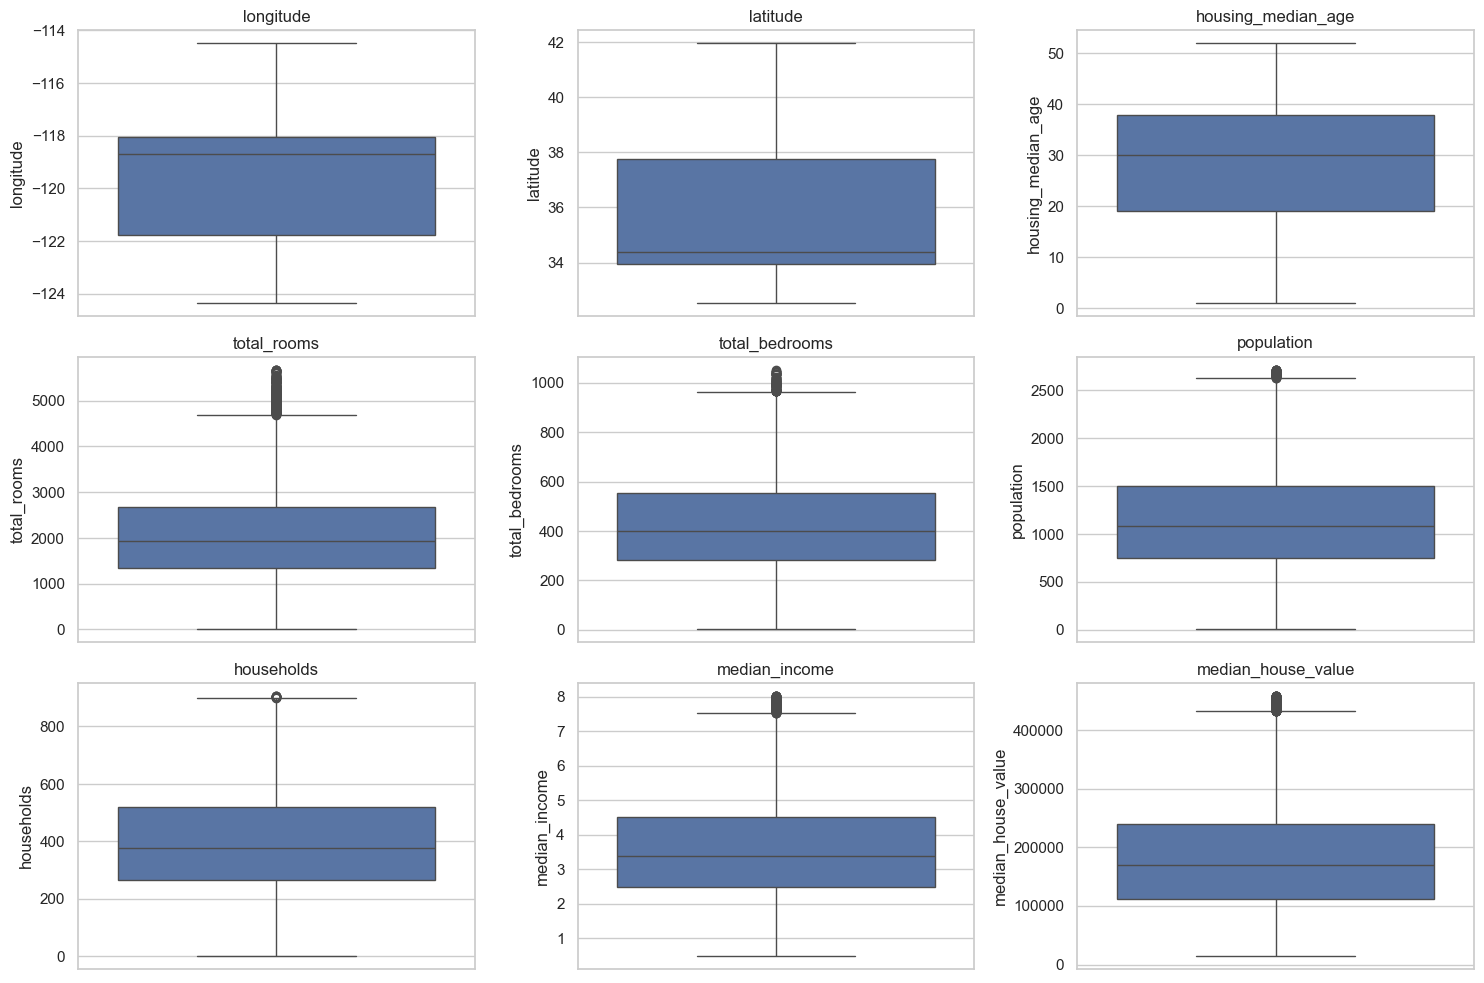

In [15]:
# Set the visual style
sns.set(style="whitegrid")

#Box plots for only numerical columns not the one-hotted columns
numerical_columns = df.columns[:-4]  # Exclude ocean_proximity T/F columns

#size of the figure
plt.figure(figsize=(15, 10))

# loops each numerical column to create box plots to check for outliers
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1) 
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [16]:
df.shape

(16724, 13)

- the new visual shows that mostly all the outliers had been dealt with, the df size went from 20433 to 16724 after the dropped data

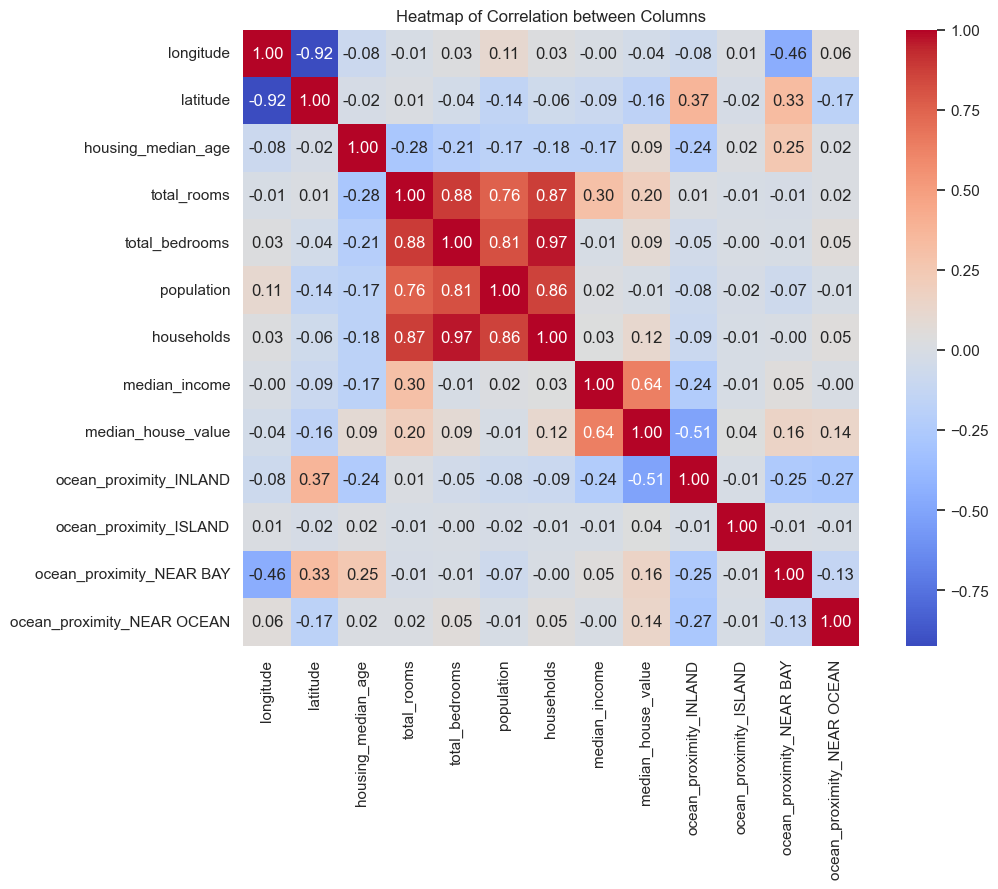

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heat map
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Set the title
plt.title('Heatmap of Correlation between Columns')

# Show the heat map
plt.show()

### Linear Regression Model

- setting up the X and y groups. The target variable (y) will be median_house_value as I am trying to predict housing prices, the features (X) will be all other columns 

In [18]:
X = df.drop(columns=['median_house_value'])  # Features are all columns except 'median_house_value' (the target)
y = df['median_house_value']  # Target variable is 'median_house_value' 

#Setting up train test groups with 20% in testing group and 80% in training group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- creating a fitting the linear regression model

In [19]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predictions for the model
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 42431.507391455314
Mean Squared Error (MSE): 3229048047.4781094
R² Score: 0.6225195311319576


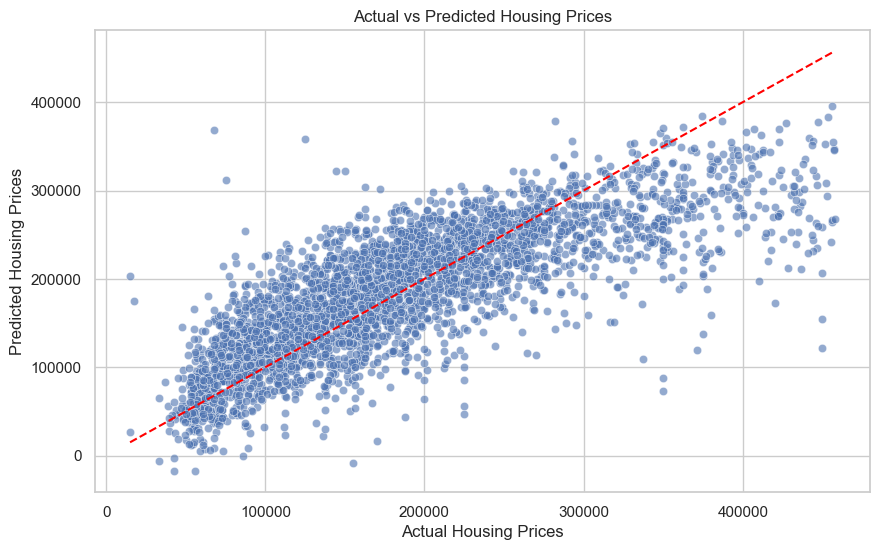

In [21]:
# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Set titles and labels
plt.title('Actual vs Predicted Housing Prices')
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')

# Show the plot
plt.show()